In [1]:
#Imports

import requests
import json
import re
import numpy as np
import pandas as pd
from googletrans import Translator
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
from datetime import datetime, timedelta, date

# Load

Rockets

In [24]:
#Exract

# Define your start and end dates
start_date = datetime(2014, 7, 24)
end_date =  datetime.today()



#Columns    
ID = []
Area = []
Date = []
Time = []
Category = []

# Define the step, in this case, one day
step = timedelta(days=1)

# Loop through the dates
current_date = start_date
while current_date <= end_date:
    url = f"https://www.oref.org.il/Shared/Ajax/GetAlarmsHistory.aspx?lang=he&fromDate={current_date}&toDate={current_date}&mode=0"
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        json_data = response.json()
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        
    for event in json_data:
        ID.append(event["rid"])
        Area.append(event["data"])
        Date.append(event["date"])
        Time.append(event["time"])
        Category.append(event["category_desc"])
        
    current_date += step
        
    
  



data = {"ID": ID, "Area": Area, "Date": Date, "Time": Time, "Category": Category}
df = pd.DataFrame(data)


In [204]:
Rockets = pd.read_csv("Rockets.csv")

War

In [37]:
tables=pd.read_html("https://he.wikipedia.org/wiki/%D7%9E%D7%91%D7%A6%D7%A2%D7%99_%D7%A6%D7%91%D7%90_%D7%94%D7%92%D7%A0%D7%94_%D7%9C%D7%99%D7%A9%D7%A8%D7%90%D7%9C")
Wars = tables[15]

In [38]:
Wars = pd.read_csv("Wars.csv")

'Wars = pd.read_csv("Wars.csv")\nWars'

Cities

In [74]:
tables=pd.read_html("https://he.wikipedia.org/wiki/%D7%A2%D7%A8%D7%99%D7%9D_%D7%91%D7%99%D7%A9%D7%A8%D7%90%D7%9C")
Cities = tables[0]

In [32]:
Cities = pd.read_csv("Cities.csv")

# Transform

Rockets

In [61]:
#load

Rockets = pd.read_csv("Rockets.csv")
Rockets = Rockets.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [62]:
#Incremental

# Define your start and end dates
start_date = datetime(2014, 11, 10)
end_date =  datetime.today().date()


#Columns    
ID = []
Area = []
Date = []
Time = []
Category = []


url = f"https://www.oref.org.il/Shared/Ajax/GetAlarmsHistory.aspx?lang=he&fromDate={start_date}&toDate={end_date}&mode=0"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    json_data = response.json()
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    
for event in json_data:
    ID.append(event["rid"])
    Area.append(event["data"])
    Date.append(event["date"])
    Time.append(event["time"])
    Category.append(event["category_desc"])
    
    
data = {"ID": ID, "Area": Area, "Date": Date, "Time": Time, "Category": Category}
df = pd.DataFrame(data)

# Concatenate vertically
Rockets = pd.concat([Rockets, df], ignore_index=True)

In [63]:
Rockets

,ID,Area,Date,Time,Category
0,9,באר שבע 289,24.07.2014,17:06:49,ירי רקטות וטילים
1,8,"באר שבע 288, באר שבע 289",24.07.2014,17:06:15,ירי רקטות וטילים
2,7,באר שבע 288,24.07.2014,17:06:14,ירי רקטות וטילים
3,6,"באר שבע 288, באר שבע 291",24.07.2014,17:06:11,ירי רקטות וטילים
4,5,"באר שבע 288, באר שבע 289, באר שבע 291",24.07.2014,17:06:08,ירי רקטות וטילים
...,...,...,...,...,...
23046,23132,מבקיעים,22.10.2023,11:03:45,ירי רקטות וטילים
23047,23131,גיאה,22.10.2023,11:03:45,ירי רקטות וטילים
23048,23130,אזור תעשייה הדרומי אשקלון,22.10.2023,11:03:45,ירי רקטות וטילים
23049,23127,אזור תעשייה הדרומי אשקלון,22.10.2023,10:16:17,ירי רקטות וטילים


In [64]:
#Format

Rockets['Date'] = pd.to_datetime(Rockets['Date'],format='%d.%m.%Y')
Rockets['Temp'] = pd.to_datetime(Rockets['Time'])
Rockets['Hour'] = Rockets['Temp'].dt.hour
Rockets.drop('Temp', axis=1, inplace=True)

In [65]:
print("Last Alarms")
Rockets =Rockets.sort_values(['Date', 'Time'])
Rockets.tail()

Last Alarms


,ID,Area,Date,Time,Category,Hour
21055,25122,כרם שלום,2023-11-16,16:47:29,ירי רקטות וטילים,16
21053,25124,סעד,2023-11-17,07:47:06,ירי רקטות וטילים,7
21054,25123,כפר עזה,2023-11-17,07:47:06,ירי רקטות וטילים,7
21052,25125,נירים,2023-11-17,08:31:37,ירי רקטות וטילים,8
21051,25126,כיסופים,2023-11-17,11:34:42,ירי רקטות וטילים,11


In [66]:
print('the last alarm happened:')
print(Rockets.iloc[-1]['Time'])
print(Rockets.iloc[-1]['Date'])

the last alarm happened:
11:34:42
2023-11-17 00:00:00


Haravot

In [67]:
#only the war

# Set the filter date
start_date = pd.to_datetime('2023-10-07')

# Filter the DataFrame
Haravot = Rockets[Rockets['Date'] >= start_date]

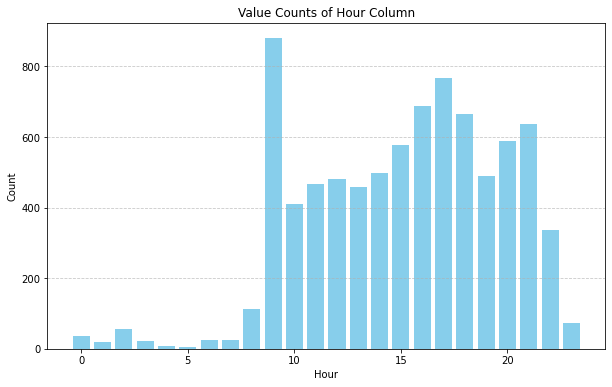

In [68]:
# Create a DataFrame with value counts of 'hour_column'
hour_counts = Haravot['Hour'].value_counts().sort_index().reset_index()
hour_counts.columns = ['Hour', 'Count']

# Plot the value counts using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hour_counts['Hour'], hour_counts['Count'], color='skyblue')
plt.title('Value Counts of Hour Column')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

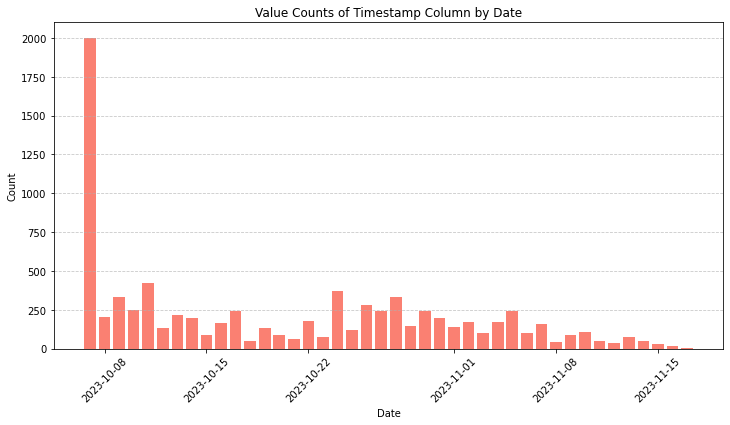

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a DataFrame with value counts of 'timestamp_column' by date
date_counts = Haravot['Date'].dt.date.value_counts().sort_index().reset_index()
date_counts.columns = ['Date', 'Count']

# Plot the value counts using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(date_counts['Date'], date_counts['Count'], color='salmon')
plt.title('Value Counts of Timestamp Column by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_5360\2756040556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Area'] = [s[::-1] for s in list(filtered_df['Area'])]


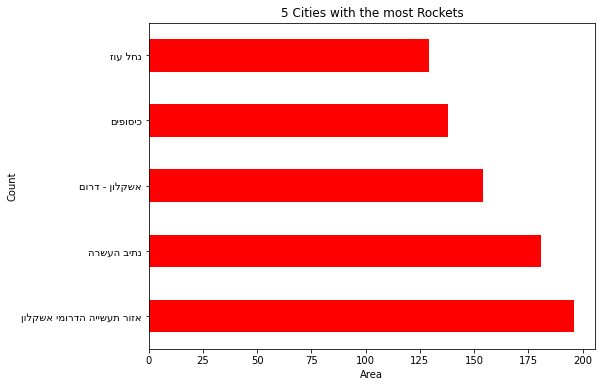

In [70]:
# Count values
category_counts = Haravot['Area'].value_counts()


top_categories = category_counts.nlargest(5).index

# Filter the DataFrame to include only the top categories
filtered_df = Haravot[Haravot['Area'].isin(top_categories)]

#reversed
list(filtered_df['Area'])
filtered_df['Area'] = [s[::-1] for s in list(filtered_df['Area'])]


# Plot a bar chart
plt.figure(figsize=(8, 6))
filtered_df['Area'].value_counts().plot(kind='barh', color='red')
plt.title('5 Cities with the most Rockets')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

cities

In [10]:
tables=pd.read_html("https://he.wikipedia.org/wiki/%D7%A2%D7%A8%D7%99%D7%9D_%D7%91%D7%99%D7%A9%D7%A8%D7%90%D7%9C")
Cities = tables[0]

In [11]:
#Replace City Name

Cities['שם העיר'].replace('תל אביב-יפו', 'תל אביב', inplace=True)
Cities['שם העיר'].replace('בת ים', 'בת-ים', inplace=True)
Cities['שם העיר'].replace('אום אל-פחם', 'אום אל פחם', inplace=True)
Cities['שם העיר'].replace('באר יעקב[23]', 'באר יעקב', inplace=True)
Cities['שם העיר'].replace('מעלות-תרשיחא', 'מעלות תרשיחא', inplace=True)
Cities['שם העיר'].replace('מודיעין-מכבים-רעות', 'מודיעין', inplace=True)
Cities['שם העיר'].replace('באקה אל-גרבייה', 'באקה אל גרבייה', inplace=True)

#modeen elit

new_value = 'מודיעין עילית'
Rockets.loc[Rockets['Area'] == 'מודיעין עילית', 'Cities'] = new_value


In [12]:
#Column Cities

strings_to_check = list(Cities['שם העיר'])
strings_to_check = sorted(strings_to_check, reverse=True)

# Function to apply to each row
def is_Contain_City(data):
    # Check if any of the strings in the list are contained in the old column
    for string in strings_to_check:
        if string in data['Area']:
            return string
    
    # If none of the strings are found, assign a default value
    return 'NAN'

# Apply the function to create a new column
Rockets['Cities'] = Rockets.apply(is_Contain_City, axis=1)

In [13]:
# Perform left join on different columns
merged_df = pd.merge(Rockets, Cities, left_on='Cities', right_on='שם העיר', how='right')

In [14]:
print('הערים ה"בטוחות" בישראל')
print('')

Safe = list(merged_df[merged_df['Cities'].isna()]['שם העיר'])
for x in range(len(Safe)):
    print(Safe[x])


הערים ה"בטוחות" בישראל

נוף הגליל
טמרה
סח'נין
טירת כרמל
עראבה
מגדל העמק
יקנעם עילית


Wars


In [15]:
Wars = pd.read_csv("Wars_Hand.csv")
Wars.tail()

,Unnamed: 0,שם המבצע,מטרת המבצע,Start Date,End Date
9,20,מבצע עלות השחר,"מבצע של צה""ל שבמהלכו תקף חיל האוויר הישראלי שו...",5.8.2022,7.8.2022
10,21,מבצע ענפי זית,"מבצע של צה""ל ומנגנוני ביטחון רבים, שבמהלכו נשל...",6.2.2023,15.2.2023
11,22,מבצע מגן וחץ,"מבצע של צה""ל שבו הרג חיל האוויר הישראלי שישה מ...",9.5.2023,13.5.2023
12,23,מבצע בית וגן,"מבצע צבאי של צה""ל ושירות הביטחון הכללי במחנה ה...",3.7.2023,5.7.2023
13,24,מלחמת חרבות ברזל,מתקפת פתע נרחבת של טרור פלסטיני מרצועת עזה על ...,7.10.2023,13.11.2023


In [16]:
Wars['Start Date'] = pd.to_datetime(Wars['Start Date'],format='%d.%m.%Y')
Wars['End Date'] = pd.to_datetime(Wars['End Date'],format='%d.%m.%Y')

In [17]:
Cross = pd.merge(Wars, Rockets, how='cross')

In [18]:
War_Alarms = Cross[(Cross['Date'] >= Cross['Start Date']) & (Cross['Date'] <= Cross['End Date'])]

In [19]:
War_Alarms['Year'] = War_Alarms['Date'].dt.year

C:\Users\USER\AppData\Local\Temp\ipykernel_5360\1911626734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  War_Alarms['Year'] = War_Alarms['Date'].dt.year


C:\Users\USER\AppData\Local\Temp\ipykernel_5360\1340434998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  War_Alarms['שם המבצע'] = [s[::-1] for s in list(War_Alarms['שם המבצע'])]
C:\Users\USER\AppData\Local\Temp\ipykernel_5360\1340434998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  War_Alarms['Event'] = War_Alarms['שם המבצע'] + ' ' + War_Alarms['Year'].astype(str)


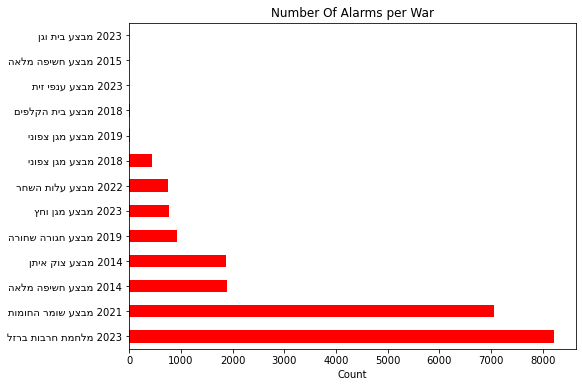

In [20]:
#reversed
list(War_Alarms['שם המבצע'])
War_Alarms['שם המבצע'] = [s[::-1] for s in list(War_Alarms['שם המבצע'])]

War_Alarms['Event'] = War_Alarms['שם המבצע'] + ' ' + War_Alarms['Year'].astype(str)


# Plot a bar chart
plt.figure(figsize=(8, 6))
War_Alarms['Event'].value_counts().plot(kind='barh', color='red')
plt.title('Number Of Alarms per War')
plt.xlabel('Count')
plt.show()

In [21]:
War_Alarms['Num_Of_Days'] = (War_Alarms['End Date'] - War_Alarms['Start Date']).dt.days + 1

C:\Users\USER\AppData\Local\Temp\ipykernel_5360\2858484446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  War_Alarms['Num_Of_Days'] = (War_Alarms['End Date'] - War_Alarms['Start Date']).dt.days + 1


In [22]:
view = War_Alarms[['Event', 'Num_Of_Days','End Date','ID']].copy()

In [23]:
result = view.groupby('Event').agg({
    'ID': ['count'],
    'End Date': ['max'],
    'Num_Of_Days': ['max']    
}).reset_index()

# Flatten the multi-level column names
result.columns = [' '.join(col).strip() for col in result.columns.values]

In [24]:
# Specify the indices of the rows you want to delete
indices_to_delete = [1, 3]

# Use the drop method to delete rows by index
result = result.drop(indices_to_delete)

In [25]:
result['Alarm_Per_Day'] = result['ID count'] / result['Num_Of_Days max']

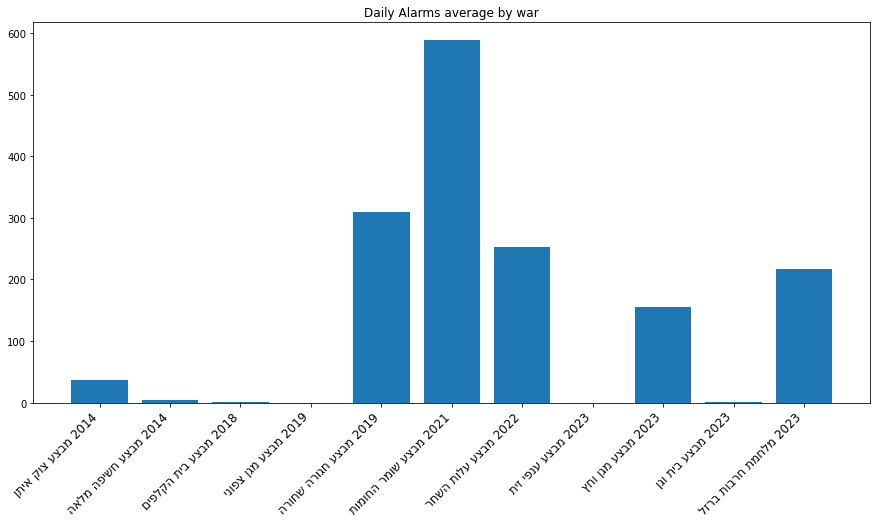

In [26]:
# Sort the DataFrame by the 'Year max' column
result = result.sort_values(by='End Date max')

# Plot the bar chart
plt.figure(figsize=(15, 7))
plt.bar(result['Event'], result['Alarm_Per_Day'])
plt.title('Daily Alarms average by war')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

Hits

In [27]:
'''
# Start a browser session (make sure to have the appropriate webdriver installed)
driver = webdriver.Chrome()

# Navigate to the page
driver.get('https://news.google.com/search?q=site%3Aynet.co.il%20%22%D7%A4%D7%92%D7%99%D7%A2%D7%94%20%D7%99%D7%A9%D7%99%D7%A8%D7%94%22&hl=he&gl=IL&ceid=IL%3Ahe')

# Scroll down (in this example, it scrolls down 5 times)
for _ in range(5):
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)  # Optional: add a sleep to give time for content to load

# Get the updated HTML source after scrolling
html_source = driver.page_source

# Close the browser
driver.quit()

# Use BeautifulSoup to parse the updated HTML
soup = BeautifulSoup(html_source, 'html.parser')

# Now you can continue with your BeautifulSoup parsing as needed'''

"\n# Start a browser session (make sure to have the appropriate webdriver installed)\ndriver = webdriver.Chrome()\n\n# Navigate to the page\ndriver.get('https://news.google.com/search?q=site%3Aynet.co.il%20%22%D7%A4%D7%92%D7%99%D7%A2%D7%94%20%D7%99%D7%A9%D7%99%D7%A8%D7%94%22&hl=he&gl=IL&ceid=IL%3Ahe')\n\n# Scroll down (in this example, it scrolls down 5 times)\nfor _ in range(5):\n    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)\n    time.sleep(1)  # Optional: add a sleep to give time for content to load\n\n# Get the updated HTML source after scrolling\nhtml_source = driver.page_source\n\n# Close the browser\ndriver.quit()\n\n# Use BeautifulSoup to parse the updated HTML\nsoup = BeautifulSoup(html_source, 'html.parser')\n\n# Now you can continue with your BeautifulSoup parsing as needed"

In [28]:


# Replace 'YOUR_GOOGLE_NEWS_URL' with the actual URL you have
url = 'https://news.google.com/search?q=site%3Aynet.co.il%20%22%D7%A4%D7%92%D7%99%D7%A2%D7%94%20%D7%99%D7%A9%D7%99%D7%A8%D7%94%22&hl=he&gl=IL&ceid=IL%3Ahe'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all the titles on the page (modify the selector according to the HTML structure of the page)
    titles = soup.find_all('h3', class_='ipQwMb ekueJc RD0gLb')  # Adjust class or tag accordingly
    dates = soup.find_all('div', class_='SVJrMe')  # Adjust class or tag accordingly
    # Extract text from the titles and store them in a list
    title_texts = [title.get_text() for title in titles]
    date_texts = [date.get_text() for date in dates]

    # Create a DataFrame from the list of titles
    Hits = pd.DataFrame({'Titles': title_texts,'Dates': date_texts})

    # Optionally, you can save the DataFrame to a CSV file
    df.to_csv('Hits.csv', index=False)
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [29]:
# Set the display options to show more characters for the 'TextColumn'
pd.set_option('display.max_colwidth', 1000)

# Display the DataFrame
Hits

,Titles,Dates
0,"דיווח על פגיעה ישירה בבניין בקריית שמונה, צוותי מד""א לא איתרו זירת נפילה",לפני 7 ימים
1,"ועדת הכספים תדון בהרחבת מתווה הפיצויים לב""ש, אשדוד ויישובי קו העימות - רק לאוקטובר",לפני 5 ימיםגד ליאורמאת גד ליאור
2,"הותר לפרסום: שני חיילי צה""ל נפצעו אתמול קשה מירי נ""ט בגבול הצפון",לפני 4 ימיםיאיר קראוסמאת יאיר קראוס
3,"האזעקות בצפון: התקבל דיווח ראשוני על פגיעה בבניין בק""ש, אך לא אותרה זירת נפילה",לפני 7 ימים
4,"שלמה נפגע אנושות מירי הנ""ט בגליל העליון: ""זה נס שהוא עדיין חי""",לפני 4 ימים
...,...,...
95,"מטחים לדרום: 3 פצועים, פגיעה ישירה במפעל",11 בנוב׳ 2012
96,"פגיעה ישירה בבית באשקלון, סריקות אחר לכודים",8 באוק׳
97,פגיעה ישירה באופנוע: כך נראה סיכול ממוקד,19 בינו׳ 2014אליאור לוימאת אליאור לוי
98,"פגיעה ישירה בבית בנתיבות: ""לא רואים את הנזק הנפשי""",13 בנוב׳ 2018
